
# GLOBAL ANALYSIS OF COVID-19  DEATHS BY COUNTRY AND CONTINENT


## *SUMMARY*

* The COVID-19 pandemic has claimed the lives of more than six million people worldwide.
* The purpose of this study was to determine how well countries have been able to minimize loss of life during the ongoing COVID-19 pandemic, by analysing the cumulative number of deaths in each country relative to their total population.
* The data was obtained from the OWID COVID-19 dataset, and was filtered to include records from early 2020 (i.e. the beginning of the pandemic) to the end of 2022.
* Data cleaning and wrangling was performed using pandas, and representative bar graphs were plotted using matplotlib.
* The results showed that Europe reported the highest cumulative death rates out of all the continents, with most of the deaths being reported in the Slavic and Eastern European countries. Oceania reported the lowest cumulative death rate, while Africa had the lowest median death rate with minimal variability. Peru reported the highest death rate of all the countries in the global dataset.
* It is recommended to promote consistency in data collection by countries around the world in order to ensure the highest quality data is available for analysis.

## *BACKGROUND*

* Coronavirus disease 2019 (COVID-19) is a disease caused by infection by the SARS-CoV2 virus <a href="#Ref1"><b>[1]</b></a>. The COVID-19 pandemic is an ongoing global COVID-19 outbreak that began in early 2020, with periodic spikes, or waves, occurring at different times throughout the world. To date, the COVID-19 pandemic has caused over 600 million cases and claimed the lives of more than 6 million people worldwide, making it one of the deadliest pandemics in recorded history.

* Understanding the dynamics of COVID-19 transmission and outcome measures, such as number of cases and deaths, requires constant analysis of well-curated datasets. The purpose of this study was to study the current data on COVID-19 death rates in different countries, and to observe any patterns or outliers in the data, and identify any potential useful insights about the dataset. 

* The primary research questions being addressed here is whether there are any noticeable, or unexpected, observations regarding the death rate of different countries, and whether some countries or continents were hit harder than others.

* This study was mainly done out of genuine interest in the subject matter. However, determining which countries reported higher, or lower, death rates could provide valuable public health information that could be used to improve situations for countries struggling with the COVID-19 pandemic. 

## *METHODOLOGY*

* Python was used throughout the data analysis, and the main libraries used were `pandas` (for data collection and wrangling) and `matplotlib` (for generating plots). The `HTML` and `display` functions were imported from the `IPython.display` library to center-align the plots.
* The COVID-19 data used was obtained from **Our World in Data** (OWID; <a href="#Ref2"><b>[2]</b></a>), which is an open-access scientific publication and data repository that conducts research into various global issues, such as climate change, hunger, poverty, and disease. The specific dataset used in this study was retrieved from the COVID-19 data repository on the OWID GitHub page <a href="#Ref3"><b>[3]</b></a>, and includes data from the beginning of the pandemic, to the present.   
* To prepare the data, the countries with missing values for COVID-19 deaths were removed, and the dataset was filtered to only include relevant features, such as `iso_code`, `continent`, `date`, `location`, and `total_deaths_per_million`. `total_deaths` was not chosen for analysis given that this may not have provided an accurate measure of the magnitude of a country's death toll, which would only be appreciable if standardized, by some metric, to the country's total population size. Therefore, `total_deaths_per_million` was chosen, given that it was derived by dividing `total_deaths` by the country's total population at the time, and multiplying by one million. The data was also filtered to only include the cumulative deaths recorded up to the end of 2022 (i.e. December 31, 2022).

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### *Data Collection and Wrangling*

In [2]:
# Import OWID dataset
df = pd.read_csv("owid-covid-data.csv")

In [3]:
# Select relevant features of dataset
df = df[["iso_code",
         "continent",
         "date",
         "location",
         "total_deaths_per_million"]]

In [4]:
# Filter dataset to only show cumulative data up to the end of 2022
df = df[df["date"]=="2022-12-31"]

In [5]:
# Find all unique continents in the dataset
uniq_cont = df["continent"].unique()
print(uniq_cont)

['Asia' nan 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


In [6]:
# Filter dataset to only include relevant country iso_codes (i.e. 3-letter codes)
# Sort values by iso_code and continent and drop countries that contain missing values  
df = df[df["iso_code"].str.len()==3].sort_values(by=["iso_code","continent"])
df = df.dropna()

# Only include data from specific continent 
df_afr = df[df["continent"]=="Africa"]
df_asia = df[df["continent"]=="Asia"]
df_euro = df[df["continent"]=="Europe"]
df_na = df[df["continent"]=="North America"]
df_oc = df[df["continent"]=="Oceania"]
df_sa = df[df["continent"]=="South America"]

In [7]:
# Observe the top 5 records from the African dataset
df_afr.head(5)

,iso_code,continent,date,location,total_deaths_per_million
6238,AGO,Africa,2022-12-31,Angola,54.230
36239,BDI,Africa,2022-12-31,Burundi,2.948
23958,BEN,Africa,2022-12-31,Benin,12.207
35231,BFA,Africa,2022-12-31,Burkina Faso,17.421
30088,BWA,Africa,2022-12-31,Botswana,1062.236


In [8]:
# Observe the top 5 records from the Asian dataset
df_asia.head(5)

,iso_code,continent,date,location,total_deaths_per_million
1041,AFG,Asia,2022-12-31,Afghanistan,190.840
231246,ARE,Asia,2022-12-31,United Arab Emirates,248.699
10438,ARM,Asia,2022-12-31,Armenia,3134.720
15695,AZE,Asia,2022-12-31,Azerbaijan,966.202
18793,BGD,Asia,2022-12-31,Bangladesh,171.976


In [9]:
# Observe the top 5 records from the European dataset
df_euro.head(5)

,iso_code,continent,date,location,total_deaths_per_million
3139,ALB,Europe,2022-12-31,Albania,1264.813
5219,AND,Europe,2022-12-31,Andorra,2066.556
14657,AUT,Europe,2022-12-31,Austria,2398.649
21919,BEL,Europe,2022-12-31,Belgium,2850.739
34202,BGR,Europe,2022-12-31,Bulgaria,5619.029


In [10]:
# Observe the top 5 records from the North American dataset
df_na.head(5)

,iso_code,continent,date,location,total_deaths_per_million
11464,ABW,North America,2022-12-31,Aruba,2630.121
7249,AIA,North America,2022-12-31,Anguilla,755.810
8275,ATG,North America,2022-12-31,Antigua and Barbuda,1556.968
28045,BES,North America,2022-12-31,Bonaire Sint Eustatius and Saba,1441.668
16718,BHS,North America,2022-12-31,Bahamas,2031.762


In [11]:
# Observe the top 5 records from the Oceanic dataset
df_oc.head(5)

,iso_code,continent,date,location,total_deaths_per_million
13614,AUS,Oceania,2022-12-31,Australia,651.401
49258,COK,Oceania,2022-12-31,Cook Islands,58.713
76190,FJI,Oceania,2022-12-31,Fiji,947.547
142988,FSM,Oceania,2022-12-31,Micronesia (country),507.979
116463,KIR,Oceania,2022-12-31,Kiribati,99.057


In [12]:
# Observe the top 5 records from the South American dataset
df_sa.head(5)

,iso_code,continent,date,location,total_deaths_per_million
9373,ARG,South America,2022-12-31,Argentina,2859.219
27039,BOL,South America,2022-12-31,Bolivia,1824.181
31130,BRA,South America,2022-12-31,Brazil,3222.524
44554,CHL,South America,2022-12-31,Chile,3222.447
46664,COL,South America,2022-12-31,Colombia,2735.107


## *RESULTS*

### *Part 1:  Column chart of Total COVID-19 Deaths per Million Inhabitants by Country*

<Figure size 432x288 with 0 Axes>

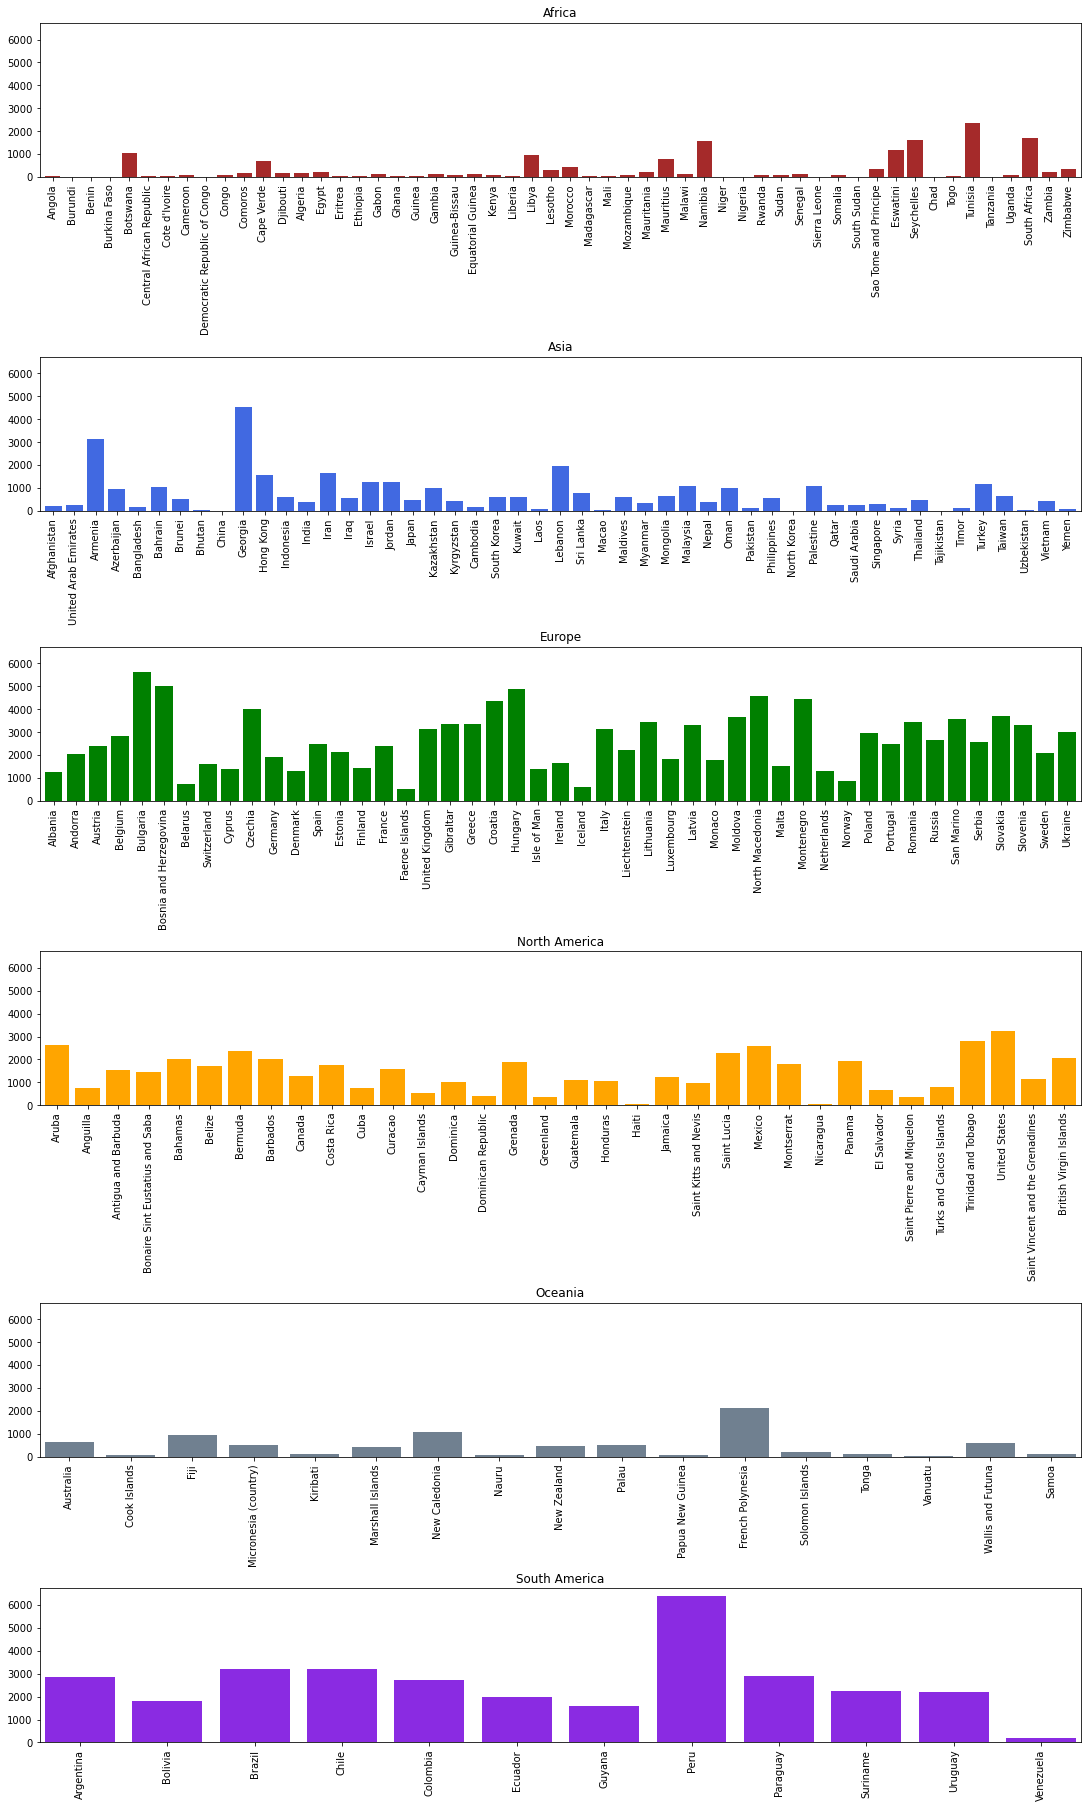

In [13]:
# Import display and HTML functions to center output graph
from IPython.display import display, HTML

# Create figure object
fig = plt.figure()

# Assign x and y data to separate objects for each continent for plotting
x1 = df_afr["location"]
y1 = df_afr["total_deaths_per_million"]

x2 = df_asia["location"]
y2 = df_asia["total_deaths_per_million"]

x3 = df_euro["location"]
y3 = df_euro["total_deaths_per_million"]

x4 = df_na["location"]
y4 = df_na["total_deaths_per_million"]

x5 = df_oc["location"]
y5 = df_oc["total_deaths_per_million"]

x6 = df_sa["location"]
y6 = df_sa["total_deaths_per_million"]


# Define subplot layout (6x1)
# Define figure size, layout style, and sharing of y-axis divisions
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1, 
                                              figsize=(15,25), 
                                              constrained_layout=True, 
                                              sharey=True)
# Align all outputs to the center
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

# Create sub-barplot for African countries
ax1.bar(x=x1,
        height=y1,
        align="center",
        color="brown")

# Rotate xtick labels 90 degrees
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
# Set x-axis margins and change African subplot title
ax1.margins(x=0.005)      
ax1.title.set_text("Africa")

# Create sub-barplot for Asian countries
ax2.bar(x=x2,
        height=y2,
        align="center",
        color="royalblue")

# Rotate xtick labels 90 degrees
for tick in ax2.get_xticklabels():
    tick.set_rotation(90) 
    
# Set x-axis margins and change Asian subplot title
ax2.margins(x=0.005)
ax2.title.set_text("Asia")

# Create sub-barplot for European countries
ax3.bar(x=x3,
        height=y3,
        align="center",
        color="green")

# Rotate xtick labels 90 degrees
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)

# Set x-axis margins and change European subplot title
ax3.margins(x=0.005)    
ax3.title.set_text("Europe")

# Create sub-barplot for North American countries
ax4.bar(x=x4,
        height=y4,
        align="center",
        color="orange")

# Rotate xtick labels 90 degrees
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)

# Set x-axis margins and change North American subplot title
ax4.margins(x=0.005)
ax4.title.set_text("North America")
    
# Create sub-barplot for Oceanic countries   
ax5.bar(x=x5,
        height=y5,
        align="center",
        color="slategray")

# Rotate xtick labels 90 degrees
for tick in ax5.get_xticklabels():
    tick.set_rotation(90)

# Set x-axis margins and change Oceanic subplot title
ax5.margins(x=0.005)      
ax5.title.set_text("Oceania")  

# Create sub-barplot for South American countries
ax6.bar(x=x6,
        height=y6,
        align="center",
        color="blueviolet")

# Rotate xtick labels 90 degrees
for tick in ax6.get_xticklabels():
    tick.set_rotation(90)

# Set x-axis margins and change South American subplot title
ax6.margins(x=0.005)
ax6.title.set_text("South America")

# Display figure
plt.show()

<center><b>Fig. 1. Cumulative COVID-19 deaths per million inhabitants from 2020-2022 of each country separated by continent</b></center>

### *Part 2: Column chart of Total COVID-19 Deaths per Million Inhabitants by Continent*

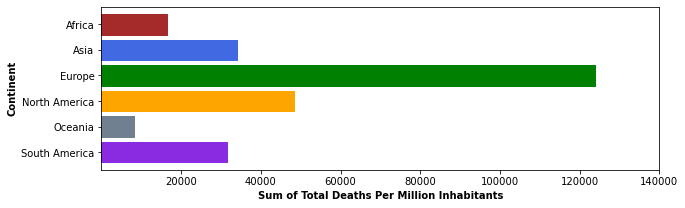

In [14]:
# Import display and HTML functions to center output graph
from IPython.display import display, HTML

# Create figure object and set figure size
fig = plt.figure(figsize=(10,3))

# Create list object from total death counts of each continent 
cont_tots = [df_afr["total_deaths_per_million"].sum(),
             df_asia["total_deaths_per_million"].sum(),
             df_euro["total_deaths_per_million"].sum(),
             df_na["total_deaths_per_million"].sum(),
             df_oc["total_deaths_per_million"].sum(),
             df_sa["total_deaths_per_million"].sum()]

# Create list object of different continents
continents = ["Africa",
              "Asia", 
              "Europe",
              "North America",
              "Oceania",
              "South America"]

# Create bar plot 
cont_bar = plt.barh(continents,
                    cont_tots)

# Match individual bar colors to previously used colors 
cont_bar[0].set_color("brown")
cont_bar[1].set_color("royalblue")
cont_bar[2].set_color("green")
cont_bar[3].set_color("orange")
cont_bar[4].set_color("slategray")
cont_bar[5].set_color("blueviolet")


# Create list object of ytick divisions
xticks = list(range(20000,150000,20000))

# Align output to the center
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

# Set yticks, set margins, and display figure
plt.xticks(ticks=xticks)
plt.xlabel("Sum of Total Deaths Per Million Inhabitants",
          fontsize=10,
          weight="bold")
plt.ylabel("Continent",
          fontsize=10,
          weight="bold")
plt.gca().invert_yaxis()
plt.show()

<center><b>Fig. 2. Cumulative COVID-19 deaths per million inhabitants by continent between 2020 and 2022.</b></center>

### *Part 3: Descriptive Statisitics of Total COVID-19 Deaths per Million Inhabitants*

In [15]:
# Create list object of death rate dfs
dfs = [df["total_deaths_per_million"],
       df_asia["total_deaths_per_million"],
       df_euro["total_deaths_per_million"],
       df_na["total_deaths_per_million"],
       df_afr["total_deaths_per_million"],
       df_sa["total_deaths_per_million"],
       df_oc["total_deaths_per_million"]]

# Create list object of column names
columns = ["TotalDeaths_World",
           "TotalDeaths_Asia",
           "TotalDeaths_Europe",
           "TotalDeaths_NorthAmerica",
           "TotalDeaths_Africa",
           "TotalDeaths_SouthAmerica", 
           "TotalDeaths_Oceania"]

# Create dictionary object
dict1 = {}

# Iterate through dfs and column name lists
for i,x in zip(dfs,columns):
        
        # Update dictionary with parameters from describe() method
        dict1.update({x:[i.describe().loc["count"], 
                         i.describe().loc["mean"],
                         i.describe().loc["std"],
                         i.describe().loc["min"],
                         i.describe().loc["25%"],
                         i.describe().loc["50%"],
                         i.describe().loc["75%"],
                         i.describe().loc["max"]]})

# Create dataframe object using updated dictionary object
df_stats = pd.DataFrame(dict1)

# Create new column called DescrStats and include describe() method parameter names
df_stats["DescrStats"] = ["count",
                         "mean",
                         "std",
                         "min",
                         "25%",
                         "50%",
                         "75%",
                         "max"]

# Rearrange columns of df_stats to put DescrStats at beginning
df_stats = df_stats[["DescrStats",
                     "TotalDeaths_World",
                     "TotalDeaths_Africa",
                     "TotalDeaths_Asia",
                     "TotalDeaths_Europe",
                     "TotalDeaths_NorthAmerica",
                     "TotalDeaths_Oceania",
                     "TotalDeaths_SouthAmerica"]]

# Set DescrStats as index
df_stats.set_index("DescrStats")

,TotalDeaths_World,TotalDeaths_Africa,TotalDeaths_Asia,TotalDeaths_Europe,TotalDeaths_NorthAmerica,TotalDeaths_Oceania,TotalDeaths_SouthAmerica
DescrStats,,,,,,,
count,213.000000,54.000000,49.000000,47.000000,34.000000,17.000000,12.000000
mean,1230.219967,305.220407,693.704959,2635.373043,1417.677735,474.567059,2619.349333
std,1291.186924,515.350562,816.591082,1235.108325,817.870376,530.041280,1459.999052
min,0.230000,2.948000,0.230000,527.138000,35.260000,42.847000,206.065000
25%,137.473000,32.801000,182.254000,1636.253500,767.408750,99.057000,1953.462250
50%,760.779000,94.433500,468.555000,2503.589000,1361.048000,408.723000,2494.492500
75%,1957.468000,220.216250,982.421000,3396.684000,1998.350750,603.656000,2983.248750
max,6409.241000,2370.000000,4512.624000,5619.029000,3229.993000,2118.893000,6409.241000


### *Part 4: Boxplot of Total COVID-19 Deaths per Million Inhabitants by Continent*

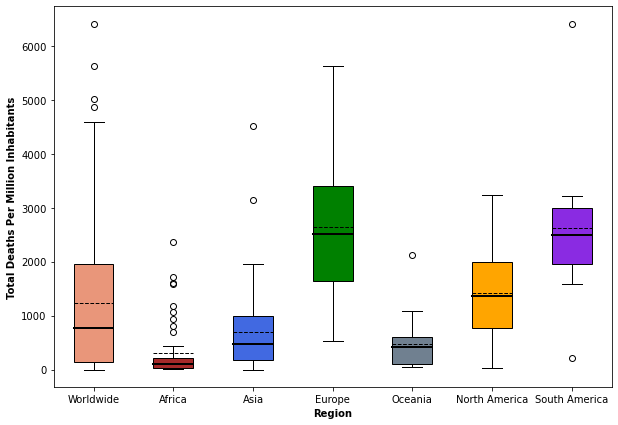

In [16]:
# Create figure and axes objects and specify figure size
fig, ax = plt.subplots(figsize=(10,7))

# Create list of different death rate dfs to plot
death_data = [df["total_deaths_per_million"],
              df_afr["total_deaths_per_million"],
              df_asia["total_deaths_per_million"],
              df_euro["total_deaths_per_million"],
              df_oc["total_deaths_per_million"],
              df_na["total_deaths_per_million"],
              df_sa["total_deaths_per_million"]]

# Create list of x-axis labels for boxplot
labels = ["Worldwide",
          "Africa",
          "Asia",
          "Europe",
          "Oceania",
          "North America",
          "South America"]

# Create list of colors to use for each box
colors = ["darksalmon",
          "brown",
          "royalblue",
          "green",
          "slategray",
          "orange",
          "blueviolet"]

# Create boxplot
bp = ax.boxplot(death_data,
                vert=True,
                patch_artist=True,
                labels=labels,
                medianprops=dict(color="black", linewidth=2), # specify median color and thickness
                meanprops=dict(color="black", linewidth=1), # specify mean color and thickness
                boxprops=dict(color="black"), # specify box outline color 
                showmeans=True,
                meanline=True)

# Iterate through boxes of boxplot object 'bp' and 'colors' list 
for box,color in zip(bp["boxes"],colors):
    box.set_facecolor(color) # Set each box to each color in list

# Set y-axis label and make bold
plt.ylabel("Total Deaths Per Million Inhabitants",
           weight="bold")

# Set x-axis label and make bold
plt.xlabel("Region",
           weight="bold")

# Show figure
plt.show()

<b>Fig. 3. Boxplot distribution of cumulative COVID-19 deaths per million inhabitants between 2020 and 2022 by region.</b> The dotted line represents the mean whereas the thick black line is the median. Outliers are depicted as circles.

## *DISCUSSION*

* The six graphs comprising **Fig. 1.** show the cumulative COVID-19 deaths per million inhabitants of every country reported in the OWID dataset, separated by continent. The countries with the highest number of recorded COVID-19 deaths in Asia appear to be the West Asian countries, Georgia and Armenia. In Europe, death rates as a whole appear to be significantly higher than other continents, with the Slavic and Eastern European countries reporting the highest number of deaths, and the Nordic countries reporting the fewest. The US has the highest rate of COVID-19 deaths of all the North American countries, with Haiti reporting the lowest death rate in the region. Tunisia reported the highest COVID-19 death rate in Africa, however, overall COVID-19 death rates appear to be lower for African countries when compared to Europe, Asia, and North America. COVID-19 deaths were also high in South American countries, with Peru appearing to have highest death rate of all the countries in the global dataset. By contrast, Venezuela recorded the fewest deaths per million inhabitants in the region. French Polynesia stood out as the country with the highest recorded death rate in Oceania. Despite this, countries in Oceania reported the lowest cumulative death rates when compared to all other continents.

* The trend observed in **Fig. 2** mirrors the general trends observed in **Fig. 1**. European countries reported the highest rate of COVID-19 deaths, which is more than twice the rate reported by North American countries, which had the second highest rate. This was followed by, in descending order, South America, Asia, Africa, and Oceania, which reported the lowest COVID-19 death rate. 

* The table of descriptive statistics in Part 3 shows the distribution of the data for the entire global dataset and for each continent. The maximum value for the cumulative COVID-19 death rate in the global dataset (6409) was also found in the South American dataset, and represents Peru. The minimum value (0.23) was found in Asia, and was reported by North Korea.    

* The boxplot in **Fig. 3** visually summarizes the distribution data found in the descriptive statistics table in Part 3. The thick black line in each box represents the median and the dotted line show the means. From this plot, the means and medians of Africa, Asia, and Oceania are shown to be below the global mean and median, whereas those of Europe, North America and South America are much higher by comparison; these findings are also supported by the data table in Part 3. Interestingly, although the horizontal bar graph in **Fig. 2** shows North America as having the second highest cumulative death rate, followed by South America, the boxplot shows the converse. This indicates that most of the values in the South American dataset are larger than those of North America, which is reflected by the relative position of the boxes. However, the whiskers of the North American dataset are longer, with the upper whisker extending to the max value of the South American dataset. The interquartile range (IQR) of the North American dataset (\~750-2000) is also larger than the South American IQR (\~2000-3000), with both being less than the IQR of Europe (\~1600-3400). Africa has the smallest IQR (\~30-200), and the lowest median value, meaning that the low death rates recorded in Africa also show the least variability of all the continents. Consequently, Africa also has highest number of outliers, which are larger than the max value. These likely raise the cumulative death rate or Africa higher than that of Oceania, as is seen in **Fig. 2**. 

* An potentially unavoidable consequence of a global pandemic occurring in multiple countries around the world is that there may be inconsistent reporting of disease-related statistics. Therefore, it is possible that the data used in this analysis may not accurately reflect the true global COVID-19 statistics, and any conclusions drawn should be understood in this context.  

* As a follow-up to the present study, the most interesting areas to pursue further would be to understand the relationships between various features of the OWID dataset. For example, the relationship between hospitalizations/deaths and booster rate would provide useful information, as well as the relationship between Gross Domestic Product (GDP) or Human Development Index (HDI) and COVID-19 death rates.

## *CONCLUSION*

* The aim of this study was to analyse the OWID COVID-19 dataset and determine whether any interesting insights could be gathered. 
* By comparing the death rate of different countries by continent, it was shown that several countries either fared better, or worse, than expected, relative to their region.
* It is possible that the data used in this analysis may not reflect the true global COVID-19 statistics, given that reporting may have been inconsistent between countries, and therefore any conclusions drawn from this analysis should take this into account.
* To increase the reliability of the current dataset, consistency when reporting COVID-19 statistics should be encouraged.

## *REFERENCES*

1. <a id="Ref1" href=https://en.wikipedia.org/wiki/COVID-19>https://en.wikipedia.org/wiki/COVID-19</a>

2. <a id="Ref2" href=https://ourworldindata.org/>https://ourworldindata.org/</a> 
    
3. <a id="Ref3" href=https://github.com/owid/covid-19-data/tree/master/public/data>https://github.com/owid/covid-19-data/tree/master/public/data</a> 